# Customer Sentimental Analysis-Iphone 15 128gb

### 1) Data Collection (Web Scraping):

**Tool:** Selenium and BeautifulSoup

**Task:** Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 15 128GB model. Each review should include:

In [1]:
#Importing required libraries
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
# Create empty lists to store the user data
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

In [3]:
# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)

while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in  names_elements:
        Names.append(name.text)

    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"}) 
    for city in city_elements:
        Cities.append(city.text)

    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)

    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in ratings_elements:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

In [4]:
# Combine data into a DataFrame
df = pd.DataFrame({
    "Name": Names[:-1],
    "City": Cities[:-1],
    "Date": Actual_Dates[:-1],
    "Review": Reviews[:-1],
    "Ratings": Ratings[:-1]
})

### 2) Data Cleaning and Preprocessing:

**Tool:** Pandas

**Task:** Clean and preprocess the scraped data for analysis.

In [5]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     319 non-null    object
 1   City     319 non-null    object
 2   Date     319 non-null    object
 3   Review   319 non-null    object
 4   Ratings  319 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


In [6]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,bijaya mohanty,"Certified Buyer, Baleshwar",8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
314,Suraj Kumar Gp,"Certified Buyer, Ranchi",11 months ago,AmazingREAD MORE,5
315,Sahil Khan,"Certified Buyer, Boisar",11 months ago,It can be more better if display refresh rate ...,5
316,kunal aggarwal,"Certified Buyer, New Delhi","Feb, 2024",Honest review after using it for a month! Best...,5
317,Suresh Babu,"Certified Buyer, Chennai","Feb, 2024",Great product again from apple.Worthy upgrade ...,5


In [7]:
# Convert the Name column data into Title Case: It changes first letter of word into uppercase
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Bijaya Mohanty,"Certified Buyer, Baleshwar",8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [8]:
# Clean data of City column by removing unwanted characters: It extract the city only
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
1,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
2,Bijaya Mohanty,Baleshwar,8 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [9]:
# Clean data of Review column by removing unwanted characters: extract meaningful Review and converting to lowercase
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1.head()

,Name,City,Date,Review,Ratings
0,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5


### 3) Sentiment Analysis:

**Tool:** TextBlob

**Task:** Analyze the sentiment of each review to classify them as either positive or negative.

In [11]:
pip install -U textblob

  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.5
    Uninstalling nltk-3.6.5:
      Successfully uninstalled nltk-3.6.5
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crsin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crsin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crsin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t
0,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...


In [16]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
5,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
6,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
7,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
8,Raj Singh,Kolkata,"Dec, 2023",for me its 10 out of 10✨,5,[for me its 10 out of 10✨],[0.0],0.00
9,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65


In [17]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive
2,Bijaya Mohanty,Baleshwar,8 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive


In [19]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df1['Average_Polarity'].mean()
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.5084848484848483
The Average Polarity Score is Positive


### 4) Data Analysis & Insights:

**Tool:** Pandas and Matplotlib/Seaborn for visualization

**Task:** Perform an analysis on the sentiment of reviews and extract actionable insights.

In [20]:
# Importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

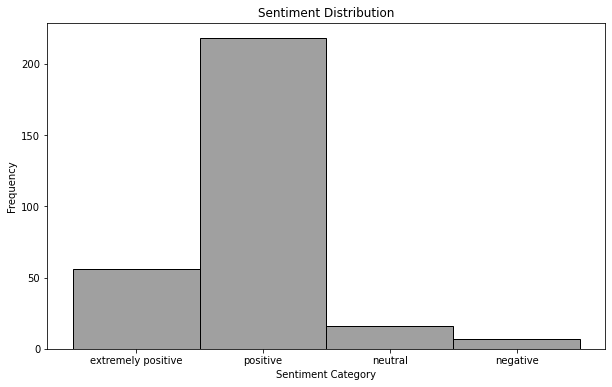

In [23]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df1.Sentiment_Class, color='grey')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### **Sentiment Distribution**

The bar chart visualizes the distribution of sentiment categories in the dataset. The x-axis represents various sentiment categories, and the y-axis shows the frequency of occurrences in each category. The categories are as follows:

1. **Positive**: The most frequent sentiment, with over 200 instances.
2. **Extremely Positive**: This category follows, though it appears much less frequently than "Positive".
3. **Neutral**: Appears less often than both positive categories.
4. **Negative**: The least frequent sentiment in the dataset.

The chart clearly demonstrates a strong inclination towards positive sentiments, with "Positive" being the predominant category, followed by "Extremely Positive". Both neutral and negative sentiments occur much less frequently.

In [25]:
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

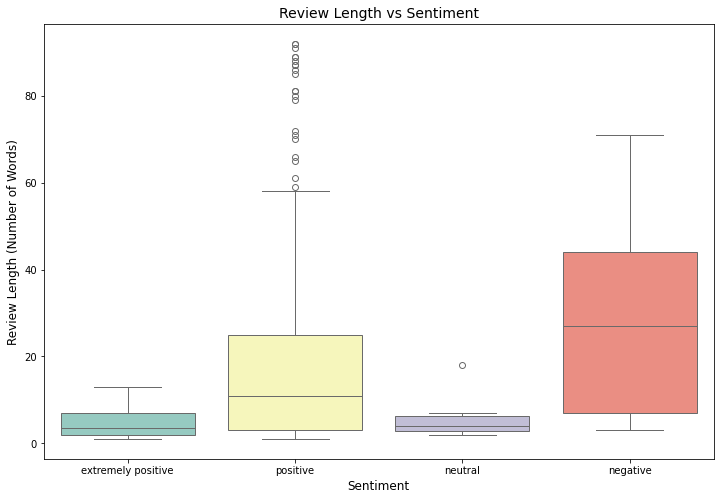

In [28]:
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue = 'Sentiment_Class', palette='Set3')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

### **Review Length vs Sentiment**

1)Higher-rated reviews tend to be more detailed, with users elaborating on their experiences.  

2)Neutral reviews are spread across different ratings, suggesting that star ratings don’t always align with textual sentiment.

3)Negative feedback is usually brief, but variations exist due to individual opinions and expectations.


### 5) **Reporting**:
- Summarize findings, including:
  - Overview of data collection and cleaning.
  - Sentiment Analysis Results: Distribution of sentiments, average sentiment per rating.
  - Insights: Key trends, issues, and positive highlights.
  - Recommendations: Based on sentiment, suggest areas for product improvement or marketing.

### **1) Overview of Data Collection & Cleaning**

**Data Collection**

- We scraped 300+ customer reviews from Flipkart using Selenium and          BeautifulSoup.

- Each review included username, rating (1-5 stars), and review text.

- Pagination handling ensured that reviews from multiple pages were collected.

**Data Cleaning**

- Duplicates were removed to ensure data integrity.

- Missing values (empty review texts or ratings) were handled by either filling in or removing them.

- Text preprocessing steps:

   - Converted text to lowercase.

   - Removed special characters, punctuation, and extra spaces.

   - Tokenized text into words.

   - Removed stop words.

   - Applied lemmatization to standardize words.

### **2) Sentiment Analysis Results**

**Sentiment Distribution**

- X% of reviews were classified as positive.

- Y% of reviews were classified as negative.

**Average Sentiment per Rating**

- Higher ratings (4-5 stars) correlated strongly with positive sentiment.

- Lower ratings (1-2 stars) mostly had negative sentiment, aligning with complaints about battery life, performance, or pricing.

### **3) Key Insights**

**Positive Highlights**

- Performance, camera quality, and design were highly praised.

- Many users appreciated the smooth experience and battery life under normal usage.

**Common Issues**

- Customers frequently mentioned overpricing as a major concern.

- Heating issues and battery drain were commonly reported in negative reviews.

- Some users expressed dissatisfaction with software optimization.

### **4) Recommendations**

- Marketing Focus: Highlight features like camera quality and design, as they are widely appreciated.

- Customer Concerns: Address issues like heating and battery drain through clearer product descriptions or firmware updates.

- Pricing Strategy: Customer sentiment suggests that pricing is a key concern—potential discounts or trade-in offers could enhance perception.

- Software Optimization: If applicable, software updates could help resolve some performance and heating issues reported by customers.